# Homework 1
Diego Rivera Garrido(1674196), d.rivera.garrido@student.tue.nl

Iliyan vasilev Teofilov(1671952), i.v.teofilov@student.tue.nl

Nicolas Martinez van der Looven(2064839), n.martinez.van.der.looven@student.tue.nl

In [1]:
import numpy as np

## 1 Gradient Descent

First we implemented python functions forthe sigmoide, f and ∇f.

In [2]:
def sigmoide(x):
    return np.exp(x)/(1+np.exp(x))

def f(x):
    w,b = x[0],x[1]
    #return -np.log(sigmoide(w+b))-np.log(sigmoide(1.5*w+b))-np.log(sigmoide(-2*w-b))
    return -0.5*w -b + np.log(1 + np.exp(w+b)) + np.log(1 + np.exp(1.5*w+b))+ np.log(1 + np.exp(-2*w-b))

def grad_f(x):
    w,b = x[0],x[1]
    return np.array([-0.5 + sigmoide(w+b) + 1.5*sigmoide(1.5*w+b) - 2*sigmoide(-2*w-b),
            -1 + sigmoide(w+b) + sigmoide(1.5*w+b) - sigmoide(-2*w-b)])

Below we implemented the gradient descent algorithm given starting point w₀,b₀, f, ∇f and the stepsize function η(t). The result is the last iteration function value f(x) and the lowest (best) function value achieved throughout all iterations.

In [3]:
def gradient_descent(f, grad_f, eta, w_0, b_0, max_iter=100):
    x = np.array([w_0,b_0])
    fmin = np.inf
    for t in range(0,max_iter):
        x = x - eta(t)*grad_f(x)
        fx = f(x)
        if (fx < fmin): 
            fmin = fx
    return fx,fmin

#### 1.a
Run algorithm with  constant stepsize strategy, η=0.2 constant.

In [4]:
def eta_const(t,c=0.2):
    return c

In [5]:
gradient_descent(f,grad_f,eta_const,1,1,100)

(1.0932277009188751, 1.0932277009188751)

#### 1.b
Run algorithm with decreasing step-size strategy, η(t)=0.2/√(t+1).

In [6]:
def eta_sqrt(t,c=0.2):
    return c/(np.sqrt(t+1))

In [7]:
gradient_descent(f,grad_f,eta_sqrt,1,1,100)

(1.6965683333378159, 1.6965683333378159)

#### 1.c
Run algorithm with multi-step step-size strategy.

In [8]:
def eta_multistep(t, milestones=[20,50,80], c=0.2, eta_init=0.2):
    factor = len(milestones)
    for i in range(len(milestones)):
        if t < milestones[i]:
            factor = i
            break
    return eta_init * c**factor

In [9]:
gradient_descent(f,grad_f,eta_multistep,1,1,100)

(1.5983060979559247, 1.5983060979559247)

## 2 Coordinate Descent

Below we implemented a function for evaluating f(x).

In [10]:
def f(x):
    return (1/2) *(x[0] ** 4) - x[0] * x[1] + (x[1] ** 2) + x[1] * x[2] + (x[2] ** 2)

#### 2.a
To compute argmin_xi f(x), we will compute the partial derivative of f wrt xi and equal it to zero to check the stationary points, in other words, we solve for xi in df(x)/dxi=0. Next, we find which stationary point evaluated on the second derivative wrt xi yields a positive value to find the minimum.

For x₁, we solve df/dx₁ = 2x₁^3 - x₂ = 0 and d²f/dx₁² = 6x₁^2 > 0 -> x₁ = (x₂/2)^⅓ 

For x₂, we solve df/dx₂ = -x₁ + 2x₂ + x₃ = 0 and d²f/dx₂² = 2 > 0 -> x₂ = (x₁ - x₃)/2

For x₃, we solve df/dx₃ = x₂ + 2x₃ = 0 and d²f/dx₃² = 2 > 0 -> x₃ = -x₂/2

In [11]:
def argmin(x): # mind the index shift
    # x₁ = (x₂/2)^⅓ 
    argminx0 = pow(x[1]/2, 1/3).real # truncate to real part
    # x₂ = (x₁ - x₃)/2
    argminx1 = (x[0]-x[2])/2
    # x₃ = -x₂/2
    argminx2 =  -x[1]/2
    return (argminx0,argminx1,argminx2)


In [12]:
x_0=[2,3,4]
for i in range(0,3):
    print("i = " + str(i) + ": " + str(argmin(x_0)[i]))
    print()


## quick test
for t in range(-100, 100):
    if ( f( [t, x_0[1], x_0[2]] ) < f( [argmin(x_0)[0], x_0[1], x_0[2]] ) ):
        print("not min.")
    if ( f( [x_0[0], t, x_0[2]] ) < f( [x_0[0], argmin(x_0)[1], x_0[2]] ) ):
        print("not min.")
    if ( f( [x_0[0], x_0[1], t] ) < f( [x_0[0], x_0[1], argmin(x_0)[2]] ) ):
        print("not min.")

i = 0: 1.1447142425533319

i = 1: -1.0

i = 2: -1.5



#### 2.b

Next, we implement the coordinate descent algorithm given f, the array of argmin and the starting point x0.

In [13]:

def coordinate_descent(f, argmin, x_0, max_iter=100):

    print("t =", 0, ":")
    print("x_t =", x_0)
    print("f(x_t) =", f(x_0))
    print()

    x_t = x_0
    for t in range(1, max_iter+1):
        # use x_t to save values of argmin we find
        print("t =", t, ":")
        for i in range(0,3):
            x_t[i] = argmin(x_t)[i] 
        print("x_t =", x_t)
        print("f(x_t) =", f(x_t))
        print()
    return x_t, f(x_t)


In [14]:
x_0=[1,20,5]
coordinate_descent(f, argmin, x_0, 100);

t = 0 :
x_t = [1, 20, 5]
f(x_t) = 505.5

t = 1 :
x_t = [2.154434690031884, -1.422782654984058, 0.711391327492029]
f(x_t) = 15.355698620925356

t = 2 :
x_t = [0.4463472463394358, -0.13252204057629663, 0.06626102028814831]
f(x_t) = 0.09216788882538113

t = 3 :
x_t = [0.20232802580270529, 0.06803350275727849, -0.03401675137863924]
f(x_t) = -0.00945576233934372

t = 4 :
x_t = [0.3240143752787107, 0.17901556332867496, -0.08950778166433748]
f(x_t) = -0.02845772875821445

t = 5 :
x_t = [0.4473220068245364, 0.26841489424443693, -0.13420744712221847]
f(x_t) = -0.046013572305576095

t = 6 :
x_t = [0.5119869268540793, 0.3230971869881489, -0.16154859349407444]
f(x_t) = -0.05277146245500104

t = 7 :
x_t = [0.5446293734587898, 0.35308898347643214, -0.17654449173821607]
f(x_t) = -0.05480670452774185

t = 8 :
x_t = [0.5609851830337869, 0.36876483738600147, -0.18438241869300073]
f(x_t) = -0.055361558822482594

t = 9 :
x_t = [0.5691671623915749, 0.37677479054228785, -0.18838739527114393]
f(x_t) = -0.055

## 3 Regression - polynomial features

#### 3.a

In this exercise we will be using the California housing dataset from sklearn.

We will compute the desing matrix for this dataset using a polynomial with degree 2, using the function PolynomialFeatures from sklearn.preprocessing. Because the data given has values in different big ranges, this function cannot compute the values for the matrix properly. To solve this what we do is standardize the data using the function StandardScaler from sklearn.preprocessing.

In [15]:

import scipy as sp
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [16]:
# Creating the data matrix
california = fetch_california_housing()
D = california.data
y = california.target
n,d = D.shape
print(n,d)


20640 8


In [17]:
# Creating a design matrix with polynomial standardized features
aff = PolynomialFeatures(2,include_bias=True)
scaler = StandardScaler()
X = aff.fit_transform(scaler.fit_transform(D))
features = aff.get_feature_names_out(california.feature_names)
print(features)

['1' 'MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedInc^2' 'MedInc HouseAge' 'MedInc AveRooms'
 'MedInc AveBedrms' 'MedInc Population' 'MedInc AveOccup'
 'MedInc Latitude' 'MedInc Longitude' 'HouseAge^2' 'HouseAge AveRooms'
 'HouseAge AveBedrms' 'HouseAge Population' 'HouseAge AveOccup'
 'HouseAge Latitude' 'HouseAge Longitude' 'AveRooms^2'
 'AveRooms AveBedrms' 'AveRooms Population' 'AveRooms AveOccup'
 'AveRooms Latitude' 'AveRooms Longitude' 'AveBedrms^2'
 'AveBedrms Population' 'AveBedrms AveOccup' 'AveBedrms Latitude'
 'AveBedrms Longitude' 'Population^2' 'Population AveOccup'
 'Population Latitude' 'Population Longitude' 'AveOccup^2'
 'AveOccup Latitude' 'AveOccup Longitude' 'Latitude^2'
 'Latitude Longitude' 'Longitude^2']


Next, we will compute the regression model minimizing the RSS for the polynomial
design matrix. To minimize RSS, we solve the system of equations given by ∇(RSS)=0

In [18]:

beta = sp.linalg.solve(X.T@X,X.T@y)
beta

array([ 1.95724199,  0.92243689,  0.1322746 , -0.39583612,  0.56212582,
        0.03851036, -1.68052409, -1.27092793, -1.16447981, -0.11299565,
        0.04446976,  0.20353088, -0.16758436,  0.12323738, -0.05110633,
       -0.61882733, -0.54901295,  0.03353488, -0.03930124,  0.06328855,
        0.04017423, -0.23751839, -0.27066427, -0.25213086,  0.04449819,
       -0.08079146, -0.19118335,  0.69090139,  0.46243774,  0.40789392,
        0.03597354,  0.2759851 , -0.42913941, -0.44237578, -0.38372053,
        0.00351097,  0.22514157,  0.05551793,  0.03325349,  0.00940107,
        0.47326301,  0.33794513,  0.28233172,  0.46261665,  0.16018745])

In [19]:
# Fetch beta values for given features
print(beta[np.where(features == "MedInc")])
print(beta[np.where(features == "MedInc AveBedrms")])
print(beta[np.where(features == "HouseAge AveBedrms")])

[0.92243689]
[-0.16758436]
[0.06328855]


#### 3.b

In this subexercise we will repeat what we did in 3.a, in this case using ridge regression with the following objective: \
min f(β) = min 1/n*‖y-Xβ‖²+λ‖β‖²

In [20]:
# Minimize Objective function f(β)=1/n*‖y-Xβ‖²+λ‖β‖² by solving the system of equations 
# given by ∇(f(β))=0 for λ=0.1
p = X.shape[1]
beta_b = sp.linalg.solve(X.T@X+n*0.1*np.eye(p),X.T@y)
beta_b

array([ 1.45624916,  0.71957545,  0.14820683, -0.14838337,  0.00862983,
       -0.00186671, -0.17832345, -0.47130572, -0.33996516, -0.02359837,
        0.05021859,  0.12503662, -0.09998862,  0.05668295, -0.03998195,
       -0.06939659, -0.05699217,  0.15959297, -0.0215094 ,  0.0092316 ,
        0.01565444, -0.0450344 , -0.03672704, -0.00781034,  0.06979771,
       -0.11923069, -0.09952622,  0.05196717,  0.06136376,  0.00995201,
        0.04975143,  0.01407802,  0.00709968, -0.00351464,  0.03412183,
        0.00363   ,  0.02554756,  0.03123771,  0.00882566,  0.0015518 ,
        0.03225161, -0.01687138,  0.04437523, -0.03313319,  0.17547435])

In [21]:
# Fetch beta values for given features
print(beta_b[np.where(features == "MedInc")])
print(beta_b[np.where(features == "MedInc AveBedrms")])
print(beta_b[np.where(features == "HouseAge AveBedrms")])

[0.71957545]
[-0.09998862]
[0.0092316]


## Bias-var trade 

In this exercise we will compute the bias² and variance of the given regression models: 
<ul>
<li> True regression function: f*(x)=tan(πx)
    <li> Fitted three regression models on the i.i.d. data samples D1,D2,D3 obtaining:
​    <ul>
        <li> f₁(x) = x + 0.2
        <li> f₂(x) = 3x + 0.3
        <li> f₃(x) = 5x + 0.1
    <ul>    
<ul>
 

In [22]:
import matplotlib.pyplot as plt

First we define functions to evaluate f*, f1, f2 and f3

In [23]:
def fstar(x): return np.tan(np.pi*x)
def fd1(x): return x + 0.2
def fd2(x): return 3*x + 0.3
def fd3(x): return 5*x + 0.1

Lets plot the function to have and idea of how the regression functions fit the true function.

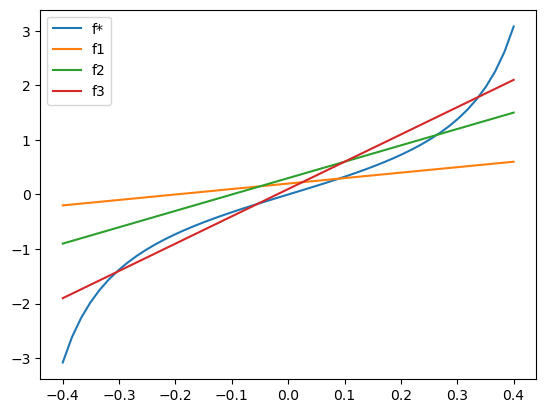

In [24]:
plt.figure()
x = np.linspace(-0.4,0.4)

plt.plot(x,fstar(x), label='f*')
plt.plot(x,fd1(x), label='f1')
plt.plot(x,fd2(x), label='f2')
plt.plot(x,fd3(x), label='f3')
plt.legend()

Finally, lets compute for x₀=0 the bias² and the variance of the models.

In [25]:
fdx0 = np.array([fd1(0),fd2(0),fd3(0)])
E = np.mean(fdx0)
bias = (fstar(0)-E)
var = np.mean((E-fdx0)**2)

print(bias**2)
print(var)

0.039999999999999994
0.006666666666666665


## Naive Bayes - 20news
From the 20Newsgroups dataset we fetch the documents belonging to three categories, which we use as classes.

In [26]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.politics.guns',
              'sci.space']

In [27]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

For example, the first document in the training data is the following one:

In [28]:
print(train.data[0])

From: fcrary@ucsu.Colorado.EDU (Frank Crary)
Subject: Re: Riddle me this...
Nntp-Posting-Host: ucsu.colorado.edu
Organization: University of Colorado, Boulder
Distribution: usa
Lines: 16

In article <1r1lp1INN752@mojo.eng.umd.edu> chuck@eng.umd.edu (Chuck Harris - WA3UQV) writes:
>>If so, why was CS often employed against tunnels in Vietnam?

>CS "tear-gas" was used in Vietnam because it makes you wretch so hard that
>your stomach comes out thru your throat.  Well, not quite that bad, but
>you can't really do much to defend yourself while you are blowing cookies.

I think the is BZ gas, not CS or CN. BZ gas exposure results in projectile
vomiting, loss of essentially all muscle control, inability to concentrate
or think rationally and fatal reactions in a significant fraction of
the population. For that reason its use is limited to military
applications.

                                                          Frank Crary
                                                          CU B

The classes are indicated categorically with indices from zero to two by the target vector. The target names tell us which index belongs to which class.

In [29]:
y_train = train.target
y_train

array([2, 2, 1, ..., 1, 2, 2])

In [30]:
train.target_names

['alt.atheism', 'sci.space', 'talk.politics.guns']

We represent the documents in a bag of word format. That is, we create a data matrix ``D`` such that ``D[j,i]=1`` if the j-th document contains the i-th feature (word), and ``D[j,i]=0`` otherwise. 

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(test.data)

We get the allocation of feature indices to words by the following array, containing the vocabulary.


In [32]:
vectorizer.get_feature_names_out()

array(['aa', 'aario', 'aaron', ..., 'zoology', 'zv', 'ÿ'], dtype=object)

For example, the word `naive` has the index 4044.

In [33]:
np.where(vectorizer.get_feature_names_out() == 'naive')[0]

array([4044])

#### 5.a
First lets compute the class prior probabilities p(y):


In [34]:
y_train_0 = np.array([x for x in y_train if x == 0])
y_train_1 = np.array([x for x in y_train if x == 1])
y_train_2 = np.array([x for x in y_train if x == 2])

p_train_0 = y_train_0.size / y_train.size
p_train_1 = y_train_1.size / y_train.size
p_train_2 = y_train_2.size / y_train.size

p_train_0, p_train_1, p_train_2

(0.2964793082149475, 0.3662754786905497, 0.3372452130945028)

#### 5.b
Lets continue by computing the log-probabilities of the word 'naive' given each class, using Laplace smoothing with α=1e-5

In [35]:
alpha = 1e-5
# Count number of documents of each class in the training set
I_0 = np.where(y_train == 0)[0]
I_1 = np.where(y_train == 1)[0]
I_2 = np.where(y_train == 2)[0]

# Count number of documents per class which includes the word 'naive'
class_counts = {0: 0, 1: 0, 2: 0}
for i in range(y_train.size):
    if D[i, 4044] == 1:
        class_counts[y_train[i]] += 1

K = vectorizer.get_feature_names_out().size

p_train_0 = (class_counts[0] + alpha) / (I_0.size + alpha * K)
p_train_1 = (class_counts[1] + alpha) / (I_1.size + alpha * K)
p_train_2 = (class_counts[2] + alpha) / (I_2.size + alpha * K)

np.log(np.array([p_train_0, p_train_1, p_train_2]))

array([-4.56448951, -6.38530041, -4.91644811])

#### 5.c
Finally, we will compute the class-conditioned log-probabilities for each word and class combination for the first document in the training dataset, using the naive Bayes algorithm.

In [36]:
alpha = 1e-5
# Count number of documents of each class in the training set
I_0 = np.where(y_train == 0)[0]
I_1 = np.where(y_train == 1)[0]
I_2 = np.where(y_train == 2)[0]

# log p(y=c)
y_train_0 = np.array([x for x in y_train if x == 0])
y_train_1 = np.array([x for x in y_train if x == 1])
y_train_2 = np.array([x for x in y_train if x == 2])

log_p_train_0 = np.log(y_train_0.size / y_train.size)
log_p_train_1 = np.log(y_train_1.size / y_train.size)
log_p_train_2 = np.log(y_train_2.size / y_train.size)

# p(xd = xdtest | y = c)
counts = {}
num_words = vectorizer.get_feature_names_out().size
train_size = y_train.size
for w in range(num_words):
    counts[w, 0] = 0
    counts[w, 1] = 0
    counts[w, 2] = 0
for w in range(num_words):
    for i in range(train_size):
        if D[i,w] == 1:
            counts[w, y_train[i]] += 1

# log p(y=c)+sum(log(p(xd = xdtest | y = c)))
for w in range(num_words):
    if D[0, w] == 1:
        log_p_train_0 += np.log((counts[w, 0] + alpha) / (I_0.size + alpha * num_words))
        log_p_train_1 += np.log((counts[w, 1] + alpha) / (I_1.size + alpha * num_words))
        log_p_train_2 += np.log((counts[w, 2] + alpha) / (I_2.size + alpha * num_words))

log_p_train_0, log_p_train_1, log_p_train_2

(-362.54772451864125, -381.4478315382202, -193.47950987244982)

## Decision tree 
Decision tree on iris dataset.

In [2]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()
D, y = iris.data, iris.target

#### 6a
We find the different probabilities in the root node, and apply the following formula to find the Gini impurity:
$$G = 1 - \sum\limits_y p(y)^2$$

In [3]:
root_lables = y

# Total number of instances in the dataset
root_total = len(root_lables)

# Calculate number of entries for each class
unique_classes, class_counts = np.unique(root_lables, return_counts=True)

# Calculate probabilities for each class
probabilities = (class_counts / root_total)

impurity_root = 1 - np.sum(probabilities**2)
print(impurity_root)

0.6666666666666667


#### 6b
We now first divide into the left and right leaf and compute the probabilities and gini impurity for each. 
The the cost is simply
$$\left( \frac{N_0}{N} \text{impurity}(L0) + \frac{N_1}{N} \text{impurity}(L1) \right) - \text{impurity}(L) $$
where L0, L1, L are the left leaf, right leaf and root respectively.

In [5]:
split_cond = 5.84
total_instances = len(D)

# Split the dataset based on the sepal length
left_leaf= np.where(D[:, 0] <= split_cond)
right_leaf= np.where(D[:, 0] > split_cond)

left_lables = y[left_leaf]
right_lables = y[right_leaf]

# Calculate number of entries for each class and probabilities
left_total = len(left_lables)
unique_classes, class_count_left = np.unique(left_lables, return_counts=True)
left_probabilities = (class_count_left / len(left_lables))
impurity_left = 1 - np.sum(left_probabilities**2)

right_total = len(right_lables)
unique_classes, class_count_right = np.unique(right_lables, return_counts=True)
right_probabilities = (class_count_right / len(right_lables))
impurity_right = 1 - np.sum(right_probabilities**2)

cost = (left_total / root_total) * impurity_left + (right_total / root_total) * impurity_right - impurity_root
print(cost)


-0.17476190476190478
